In [1]:
## Mount Drive into Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install imblearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.under_sampling import OneSidedSelection, RandomUnderSampler
from imblearn.over_sampling import ADASYN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
def prepare_features(X_train, min_df=2, max_features=None, ngram_range=(1, 3)):
    # compute tfidf features
    tfidf = TfidfVectorizer(min_df=min_df, max_features=max_features,
                strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}',
                ngram_range=ngram_range, use_idf=1, smooth_idf=1, sublinear_tf=1,
                stop_words=None, lowercase=False)

    X_train_tfidf = tfidf.fit_transform(X_train).toarray()
    return X_train_tfidf

In [18]:
# define parameters to load and prepare your data
data_folder = 'drive/My Drive/Colab Notebooks/deepALForCalibration/datasets/binary/economic_news/4_train_indexed_economic_news_binary.csv' #specify the path to the folder where you keep your datasets
pathToSaveForOneSideSelection = 'drive/My Drive/Colab Notebooks/deepALForCalibration/datasets/binary/gop_sentiment/1_train_indexed_gop_sentiment_binary_resampledByOneSideSelection.csv'
pathToSaveForUnderSampling = 'drive/My Drive/Colab Notebooks/deepALForCalibration/datasets/binary/economic_news/4_train_indexed_economic_news_binary_resampledByRandomUndersampling.csv'
pathToSaveForADASYN = 'drive/My Drive/Colab Notebooks/deepALForCalibration/datasets/binary/chemicals_disease/3_train_indexed_chemicals_disease_binary_resampledByOverSamplingADASYN.csv'

goldLabel = 'crowd_label'  # specify the column name where you keep your gold labels
txt = 'text'               # specify the column name where you keep your text data

In [ ]:
dt = pd.read_csv(data_folder)
y = dt[goldLabel].values   # specify here the column name where you keep your gold labels
X = prepare_features(dt[txt].tolist(), min_df= 0, max_features = 7000, ngram_range = (1, 3))  # specify here the tfidf parameters
X_reduced = TSNE(n_components=2).fit_transform(X) 

# **Undersampling - One Sided Selection**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


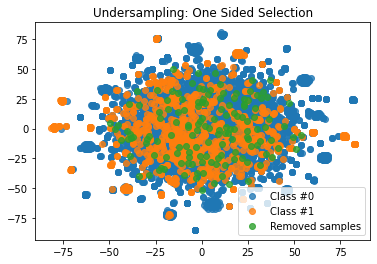

In [13]:
# under sample with One Sided Selection method
tl = OneSidedSelection(return_indices=True)

X_resampled, y_resampled, idx_resampled = tl.fit_sample(X, y)
X_resampled_reduced = TSNE(n_components=2).fit_transform(X_resampled)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

idx_samples_removed = np.setdiff1d(np.arange(X_reduced.shape[0]), idx_resampled)

idx_class_0 = y_resampled == 0
plt.scatter(X_resampled_reduced[idx_class_0, 0], X_resampled_reduced[idx_class_0, 1], alpha=.8, label='Class #0')
plt.scatter(X_resampled_reduced[~idx_class_0, 0], X_resampled_reduced[~idx_class_0, 1], alpha=.8, label='Class #1')
plt.scatter(X_reduced[idx_samples_removed, 0], X_reduced[idx_samples_removed, 1], alpha=.8, label='Removed samples')
plt.title('Undersampling: One Sided Selection')
plt.legend()
plt.show()

In [14]:
resampled_dt = dt.loc[idx_resampled].reset_index(drop=True)

zeros = resampled_dt.index[resampled_dt[goldLabel]==0].tolist()
ones = resampled_dt.index[resampled_dt[goldLabel]==1].tolist()

print("zeros", len(zeros))
print("ones", len(ones))

resampled_dt.to_csv(pathToSaveForOneSideSelection)

zeros 4899
ones 1153


In [15]:
zeros = dt.index[dt[goldLabel]==0].tolist()
ones = dt.index[dt[goldLabel]==1].tolist()

print("zeros in the original dataset", len(zeros))
print("ones in the original dataset", len(ones))

zeros 5042
ones 1153


# **Random Undersampling**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


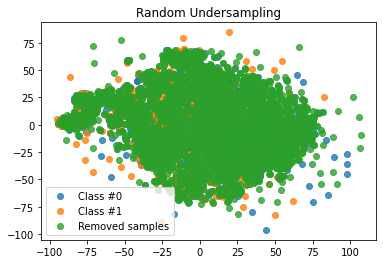

In [19]:
# Random undersampling
tl = RandomUnderSampler(return_indices=True)

X_resampled_reduced, y_resampled, idx_resampled = tl.fit_sample(X_reduced, y)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

idx_samples_removed = np.setdiff1d(np.arange(X_reduced.shape[0]), idx_resampled)

idx_class_0 = y_resampled == 0
plt.scatter(X_resampled_reduced[idx_class_0, 0], X_resampled_reduced[idx_class_0, 1], alpha=.8, label='Class #0')
plt.scatter(X_resampled_reduced[~idx_class_0, 0], X_resampled_reduced[~idx_class_0, 1], alpha=.8, label='Class #1')
plt.scatter(X_reduced[idx_samples_removed, 0], X_reduced[idx_samples_removed, 1], alpha=.8, label='Removed samples')
plt.title('Random Undersampling')
plt.legend()
plt.show()

In [20]:
resampled_dt = dt.loc[idx_resampled].reset_index(drop=True)

zeros = resampled_dt.index[resampled_dt[goldLabel]==0].tolist()
ones = resampled_dt.index[resampled_dt[goldLabel]==1].tolist()

print("zeros", len(zeros))
print("ones", len(ones))

resampled_dt.to_csv(pathToSaveForUnderSampling)

zeros 902
ones 902


# **Over Sampling with ADASYN**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


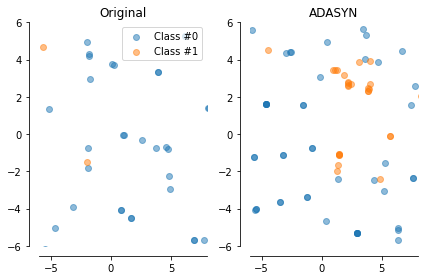

In [19]:
tl = ADASYN()

X_resampled, y_resampled = tl.fit_sample(X, y)
X_resampled_reduced = TSNE(n_components=2).fit_transform(X_resampled) 



def plot_resampling(ax, X, y, title):
    c0 = ax.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5)
    c1 = ax.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

    return c0, c1 

# generate plots
f, (ax1, ax2) = plt.subplots(1, 2)
c0, c1 = plot_resampling(ax1, X_reduced, y, 'Original')
plot_resampling(ax2, X_resampled_reduced, y_resampled, 'ADASYN')
ax1.legend((c0, c1), ('Class #0', 'Class #1'))
plt.tight_layout()
plt.show()



In [ ]:
resampled_dt = dt.loc[idx_resampled].reset_index(drop=True)

zeros = resampled_dt.index[resampled_dt[goldLabel]==0].tolist()
ones = resampled_dt.index[resampled_dt[goldLabel]==1].tolist()

print("zeros", len(zeros))
print("ones", len(ones))

resampled_dt.to_csv(pathToSaveForADASYN)